In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

# Reading of data

In [2]:
data = pd.read_csv('train.csv')
tests = pd.read_csv('test.csv')

# Analysing  dataset

In [3]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [6]:
data.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [7]:
data.isnull().values.any()

False

In [8]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

# Preprocessing of data

In [9]:
def codetrue(g):
    if g==True:
        return 0
    else:
        return 1
data['IsHoliday'] = data['IsHoliday'].apply(codetrue)

In [10]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
dtype: object

In [11]:
#Date to date time format then taking only month of that
data['Date']=pd.to_datetime(data['Date'])


#conversion of weekly sales to int type
#data['Weekly_Sales']=data['Weekly_Sales'].astype(int)


In [12]:
data['month']=data.Date.dt.month
data['year']=data.Date.dt.year
data.drop(columns='Date')

,Store,Dept,Weekly_Sales,IsHoliday,month,year
0,1,1,24924.50,1,2,2010
1,1,1,46039.49,0,2,2010
2,1,1,41595.55,1,2,2010
3,1,1,19403.54,1,2,2010
4,1,1,21827.90,1,3,2010
...,...,...,...,...,...,...
421565,45,98,508.37,1,9,2012
421566,45,98,628.10,1,10,2012
421567,45,98,1061.02,1,10,2012
421568,45,98,760.01,1,10,2012


# Studying relationships amongst columns

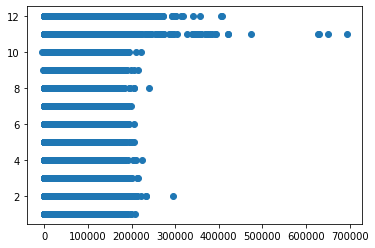

In [13]:
plt.scatter(data.Weekly_Sales,data.month)

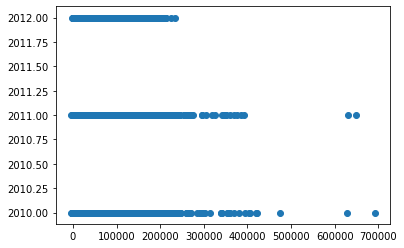

In [14]:
plt.scatter(data.Weekly_Sales,data.year)

Text(0.5, 1.0, 'Sales')

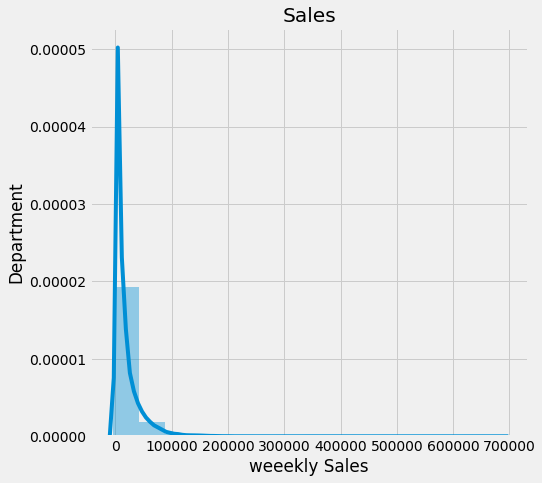

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,7))
sns.distplot(data.Weekly_Sales, bins = 15)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.ylabel("Department")
plt.xlabel("weeekly Sales")
plt.title("Sales")

# Splitting

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
feature_cols = ['Store','Dept','year','IsHoliday']
X=data[feature_cols]
X.shape

(421570, 4)

In [17]:
y=data.Weekly_Sales

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.25)

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
lin_acc = round(linreg.score(X_train,y_train)*100,2)
print('percentage : %.4g'%lin_acc)

percentage : 3


# Ridge

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
rid_accuracy = round(ridge.score(X_train,y_train)*100,2)
print('percentage : %.4g'%rid_accuracy)

percentage : 3


# Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
greg = GradientBoostingRegressor(n_estimators=350)
greg.fit(X_train,y_train)
y_pred=greg.predict(X_test)
grad_accuracy = round(greg.score(X_train,y_train)*100,2)
print('percentage : %.4g'%grad_accuracy)

percentage : 75.68


# KNeighbors Regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=13,algorithm='auto')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_accuracy = round(knn.score(X_train,y_train)*100,2)
print('percentage : %.4g'%knn_accuracy)

percentage : 90.64


# Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
tree_accuracy = round(tree.score(X_train,y_train)*100,2)
print('percentage : %.4g'%tree_accuracy)

percentage : 86.12


# So Knn has best accuracy

In [24]:
tests.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

# Preprocessing Of Data

In [25]:
def codetrue(g):
    if g==True:
        return 0
    else:
        return 1
tests['IsHoliday'] = tests['IsHoliday'].apply(codetrue)

In [26]:
tests.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday     int64
dtype: object

In [27]:
#Date to date time format then taking only month of that
tests['Date']=pd.to_datetime(tests['Date'])


#conversion of weekly sales to int type
#data['Weekly_Sales']=data['Weekly_Sales'].astype(int)


In [28]:
tests['month']=tests.Date.dt.month
tests['year']=tests.Date.dt.year
tests.drop(columns='Date')

,Store,Dept,IsHoliday,month,year
0,1,1,1,11,2012
1,1,1,1,11,2012
2,1,1,1,11,2012
3,1,1,0,11,2012
4,1,1,1,11,2012
...,...,...,...,...,...
115059,45,98,1,6,2013
115060,45,98,1,7,2013
115061,45,98,1,7,2013
115062,45,98,1,7,2013


# Prediction of data

In [29]:
Xtest = tests[['Store','Dept','year','IsHoliday']]
tests['predicted']=knn.predict(Xtest)
tests['predicted']=tests['predicted'].astype(int)

# creating new Csv file and added predicted column

In [30]:
#tests.to_csv("test_new.csv",index=False,sep=',')